In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px 
import seaborn as sns
import chart_studio.plotly as py
import pandas_datareader as data
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode,plot, iplot
init_notebook_mode(connected=True)

In [4]:
start = '2010-01-01'
end = '2021-12-31'

df = data.DataReader('AAPL', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [5]:
df = df.reset_index()
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544686
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451720
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [6]:
px.line(df, x ='Date', y=['Close', 'Open'], labels={'x': 'Date', 'y': 'Closing_Price'},
       title='Closing Price Overview')

In [7]:
px.line(df, x='Date', y=['Open', 'Close'],
       labels={'x': 'Date', 'y': 'Price'}, title='Opening vs Closing Price')

In [8]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                        mode='lines', name='Stock_Close'))

fig.update_layout(title='Stock Price Data 2010-1021',
                 xaxis_title='Date', yaxis_title='Price',
                 xaxis_rangeslider_visible=True)

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3017    153.3444
3018    153.6667
3019    153.9991
3020    154.3202
3021    154.6399
Name: Close, Length: 3022, dtype: float64

In [10]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                        mode='lines', name='Stock_Close'))
fig.add_trace(go.Scatter(x=df.Date, y=ma100,
                        mode='lines', name='Stock_Close with ma100'))


fig.update_layout(title='Stock Price Data 2010-1021',
                 xaxis_title='Date', yaxis_title='Price',
                 xaxis_rangeslider_visible=True)

In [11]:
ma200 = df.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3017    142.85570
3018    143.13220
3019    143.40125
3020    143.66845
3021    143.95365
Name: Close, Length: 3022, dtype: float64

In [12]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.Date, y=df.Close,
                        mode='lines', name='Stock_Close'))
fig.add_trace(go.Scatter(x=df.Date, y=ma100,
                        mode='lines', name='Stock_Close with ma100'))
fig.add_trace(go.Scatter(x=df.Date, y=ma200,
                        mode='lines', name='Stock_Close with ma100'))


fig.update_layout(title='Stock Price Data 2010-1021',
                 xaxis_title='Date', yaxis_title='Price',
                 xaxis_rangeslider_visible=True)

In [13]:
df.shape

(3022, 7)

In [14]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .75 ))

training_data_len

2267

In [15]:
training_data_len

2267

In [18]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00384584],
       [0.00452113],
       [0.00459731],
       ...,
       [0.9945236 ],
       [0.98772127],
       [0.9840896 ]])

In [19]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([3.84583956e-03, 4.52112883e-03, 4.59730631e-03, 3.89525473e-03,
       3.81495680e-03, 4.10319040e-03, 3.71819907e-03, 3.22613926e-03,
       3.82936876e-03, 3.57819722e-03, 2.85761599e-03, 4.73318495e-03,
       4.05172463e-03, 3.29819628e-03, 1.17351464e-03, 2.26879845e-03,
       2.85967484e-03, 3.25908362e-03, 1.49056939e-03, 2.05610186e-06,
       5.51755483e-04, 7.84400109e-04, 1.47821629e-03, 0.00000000e+00,
       7.02046083e-04, 4.26168341e-04, 8.52342181e-04, 6.32047909e-04,
       1.36292340e-03, 1.71498136e-03, 2.33674052e-03, 2.16174371e-03,
       2.23997454e-03, 1.98056485e-03, 1.72321402e-03, 1.03145669e-03,
       1.77262918e-03, 2.04850692e-03, 2.58791205e-03, 3.48761329e-03,
       3.45878938e-03, 3.55760597e-03, 3.84172186e-03, 5.53817907e-03,
       5.56494413e-03, 6.37611204e-03, 6.75081187e-03, 6.88669051e-03,
       7.11316408e-03, 6.54493505e-03, 6.67051944e-03, 6.60258012e-03,
       6.71169645e-03, 6.21758329e-03, 6.73228496e-03, 7.47551080e-03,
     

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

2207/2207 [==============================] - 99s 42ms/step - loss: 1.2155e-04


In [22]:
model.save('keras_model.h8')

INFO:tensorflow:Assets written to: keras_model.h8\assets


INFO:tensorflow:Assets written to: keras_model.h8\assets


In [23]:
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))


In [24]:
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

6.972128154066864

In [25]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9364\2657761684.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
valid


,Close,Predictions
2267,37.064999,37.515347
2268,36.982498,37.068493
2269,37.687500,36.695187
2270,38.327499,36.531654
2271,38.450001,36.593132
...,...,...
3017,180.330002,160.545700
3018,179.289993,161.900604
3019,179.380005,163.096359
3020,178.199997,164.029602


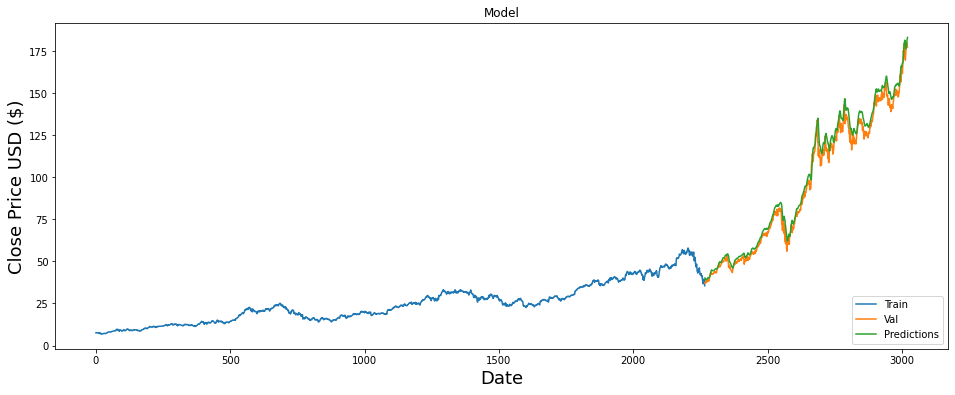

In [36]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()